In [33]:
#Importing Libraries
import pandas as pd 
import datetime 
import numpy as np
import scipy.stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools
from math import sqrt
from scipy.stats import norm
import numpy as np
import timeit

In [34]:
#Start date and End date is refers to time period for fetching the data using the Pandas dataframe API
#We have selected data for atleast 2 years to 
start_date = datetime.datetime(2016, 12, 12)
end_date = datetime.datetime(2017, 12, 12)

#Source is yahoo finance
source = 'yahoo' 

In [35]:
#We read each ticker and download information from start to end date
all_data = {ticker:web.DataReader(ticker,source,start_date,end_date)
            for ticker in ["BTC-USD", "LTC-USD", "BCH-USD","ETH-USD", "IOT-USD", "XRP-USD", "Dash-USD"]}

In [36]:
#We store only Adjusted Close price in a seperate dataset for analysis
ticker_price = pd.DataFrame({ticker: data['Adj Close']
                                  for ticker, data in all_data.items()})

In [37]:
#Saving the csv file for non-redundant data fetching
#ticker_price.dropna(0)
ticker_price.to_csv("Ticker_price.csv")

In [46]:
#Function to generate geometric brownian motion
def brownian_motion(N = 100, mu = 0.1, sigma = 0.01, S0 = 1, dt = 1):        
    X = np.random.normal(mu * dt, sigma* np.sqrt(dt), N) #standard brownian motion using normal distribution
    X = np.cumsum(X) #We perform cumulative sum generated by normal distribution
    S = S0 * np.exp(X) #geometric brownian motion
    return S

#Choosing date range as per the time period
dates = pd.date_range('2017-12-12', '2018-12-12')
D = (dates.max()-dates.min()).days / 365
N = dates.size
dt = D/N

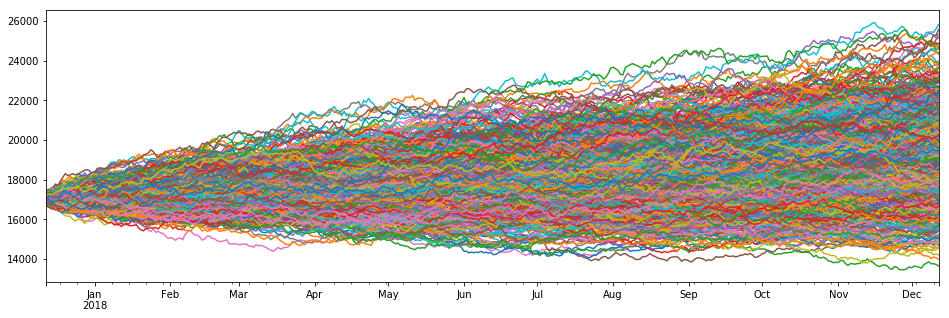

0:00:15.552924


In [47]:
#Using the initial value of the price,we generate plots for each bitcoin with iteration of 1000.Here it is BTC.
start_time_timeit = datetime.datetime.now()
start_price_BTC = ticker_price["BTC-USD"][-1]
m= 1000
for i in range(m):
    btc = pd.Series(brownian_motion( N, sigma=0.1, S0=start_price_BTC,dt = dt), index=dates)
    btc.plot(figsize=(16,5))
btc.plot(figsize=(16,5))    
plt.show()
##For optimization
print(datetime.datetime.now()- start_time_timeit)

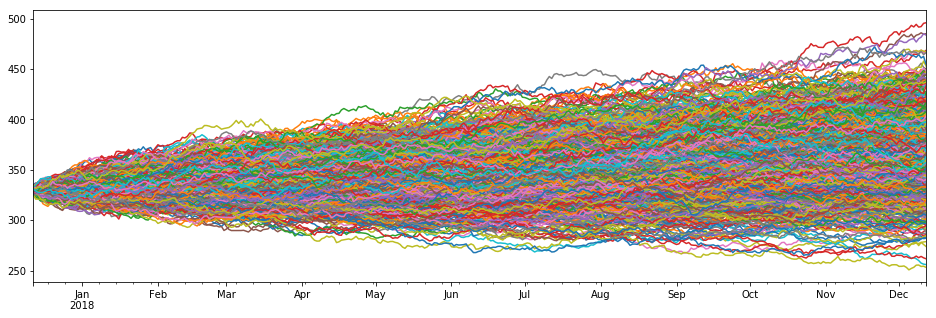

0:00:15.075900


In [48]:
# Using the initial value of the price, we generate plots for each Litecoin with iteration of 1000.Here it is LTC.
start_time_timeit = datetime.datetime.now()
start_price_LTC = ticker_price["LTC-USD"][-1]
for i in range(1000):
    ltc = pd.Series(brownian_motion(N, sigma=0.1, S0=start_price_LTC,dt =dt), index=dates)
    ltc.plot(figsize=(16,5))    
plt.show()
print(datetime.datetime.now()- start_time_timeit)

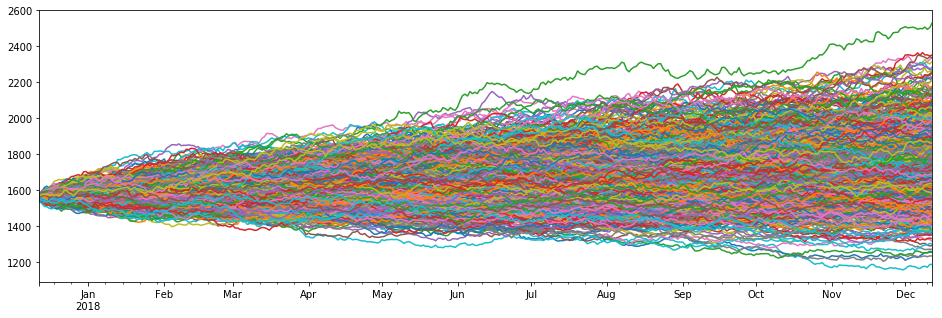

In [49]:
# Using the initial value of the price,we generate plots for each Bitcoin Cash with iteration of 1000.Here it is BCH.
start_price_BCH = ticker_price["BCH-USD"][-1]
for i in range(1000):
    bch = pd.Series(brownian_motion(N, sigma=0.1, S0=start_price_BCH, dt =dt), index=dates)
    bch.plot(figsize=(16,5))    
plt.show()

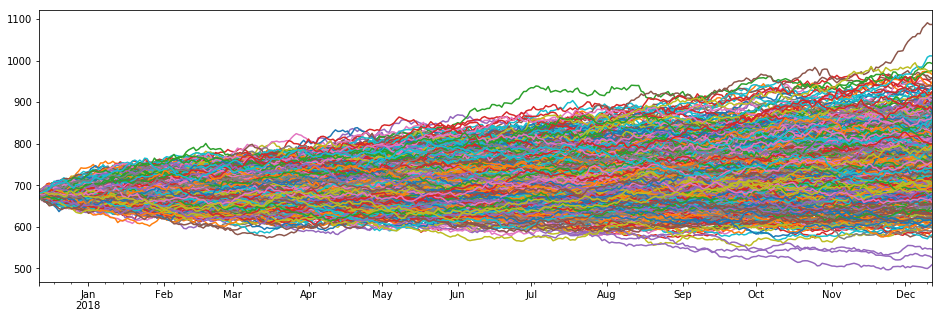

In [50]:
# Using the initial value of the price,we generate plots for each Ethereum with iteration of 1000.Here it is ETH.
start_price_ETH = ticker_price["ETH-USD"][-1]
for i in range(1000):
    eth = pd.Series(brownian_motion(N, sigma=0.1, S0=start_price_ETH, dt = dt), index=dates)
    eth.plot(figsize=(16,5))    
plt.show()

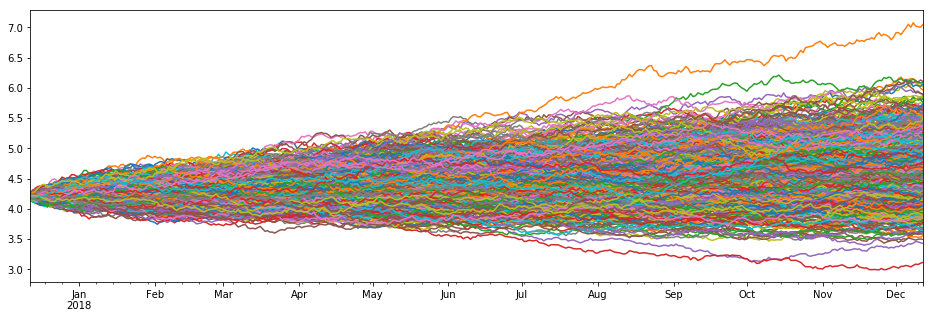

In [51]:
# Using the initial value of the price,we generate plots for each IOTA with iteration of 1000.Here it is IOT.
start_price_IOT = ticker_price["IOT-USD"][-1]
for i in range(1000):
    iot = pd.Series(brownian_motion(N, sigma=0.1, S0=start_price_IOT, dt = dt), index=dates)
    iot.plot(figsize=(16,5))    
plt.show()

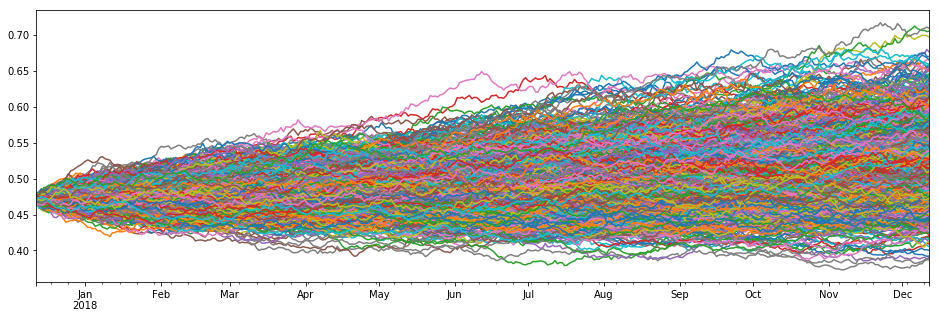

In [52]:
# Using the initial value of the price,we generate plots for each Ripple with iteration of 1000.Here it is XRP.
start_price_XRP = ticker_price["XRP-USD"][-1]
for i in range(1000):
    xrp = pd.Series(brownian_motion(N, sigma=0.1, S0=start_price_XRP, dt =dt), index=dates)
    xrp.plot(figsize=(16,5))    
plt.show()

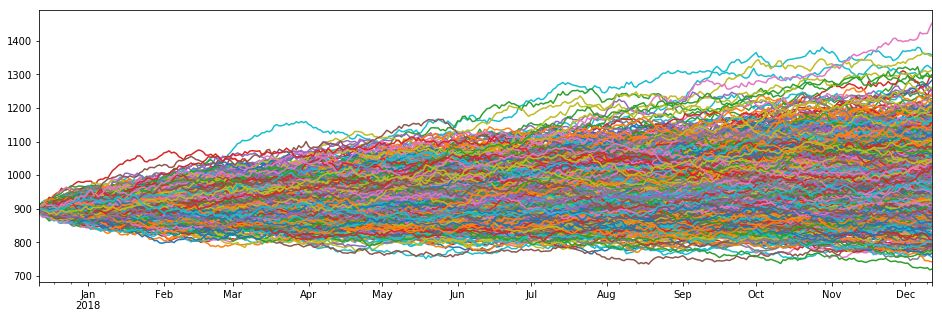

In [53]:
# Using the initial value of the price,we generate plots for each Dash Coin with iteration of 1000.Here it is BTC.
start_price_Dash = ticker_price["Dash-USD"][-1]
m= 1000
for i in range(m):
    btc = pd.Series(brownian_motion( N, sigma=0.1, S0=start_price_Dash, dt = dt), index=dates)
    btc.plot(figsize=(16,5))    
plt.show()